# Day 19: Tractor Beam

https://adventofcode.com/2019/day/19

## Part 1

Refactored Intcode program into `IntcodeV2` to accept more than one input and not to stop when output is produced. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AOC2019 import IntcodeV2, readIntcodeProg

In [2]:
prog = readIntcodeProg("input19.txt")

nx = 50
ny = 50
beam = np.zeros((ny,nx))

d = IntcodeV2(prog,"DRONE",[0,0])

print("Scanning surrounding space... ",end="")

for x in range(nx):
    for y in range(ny):
        d.reset()
        d.setInputs([x,y]) 
        d.runProgram()
        beam[y][x] = d.getLastOutput()
        
print("Done!")

Scanning surrounding space... Done!


Number of points affected by the tractor beam = 172


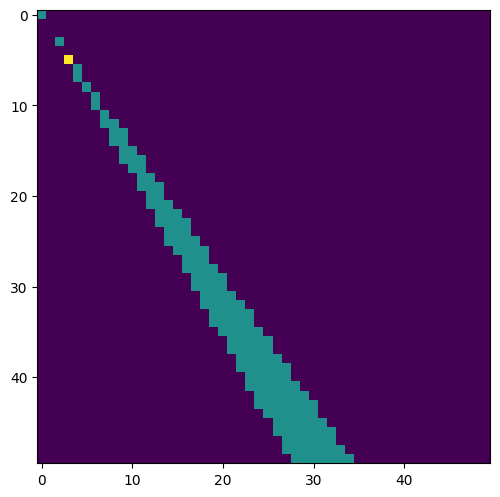

In [3]:
fig = plt.figure(figsize=(6, 6), dpi=100)

beam[5,3] = 2 # I can probably start the scan from here

plt.imshow(beam)
print("Number of points affected by the tractor beam =",int(beam[beam==1].sum()))

## Part 2

Brute force scanning cannot really work! 

I can probably move the droid to follow the beam boundaries in order to map a very large area.

The X dimension of the beam should be larger than 100, but probably smaller then 200 since the beam is not angled at 45 degrees. Assuming I want to store the scanned area to play with it later, I can probably stop the boundary scanning when the X section is 200 large, plus 100 Y to allow the 100x100 square to fit.

In [4]:
#nx = 100
#ny = 125

nx = 1000
ny = 1250

beamarea = np.zeros((ny,nx))

ymin = 5
xmin = 3

d = IntcodeV2(prog,"DRONE",[xmin,ymin])

print("Scanning LEFT flack of beam... ",end="")
x = xmin
y = ymin
while (True):
    d.reset()
    d.setInputs([x,y]) 
    d.runProgram()
    o = d.getLastOutput()
    beamarea[y,x] = o
    if o:
        y +=1
    else:
        x +=1
    if y==ny or x==nx:
        break     
print("Done!")

print("Scanning RIGHT flack of beam... ",end="")
x = xmin
y = ymin
while (True):
    d.reset()
    d.setInputs([x,y]) 
    d.runProgram()
    o = d.getLastOutput()
    beamarea[y,x] = o
    if o:
        x +=1
    else:
        y +=1
        if y<ny and x<nx:
            d.reset()
            d.setInputs([x-1,y]) 
            d.runProgram()
            o = d.getLastOutput()
            beamarea[y,x-1] = o
    if y==ny or x==nx:
        break     
print("Done!")

print("Filling beam area... ",end="")
for y in range(ymin,ny):
    if beamarea[y].sum()>1:
        x = np.where(beamarea[y]==1)[0][0]
        while( True ):
            x+=1
            if beamarea[y][x]==0:
                beamarea[y][x]=1
            else:
                break
print("Done!")

Scanning LEFT flack of beam... Done!
Scanning RIGHT flack of beam... Done!
Filling beam area... Done!


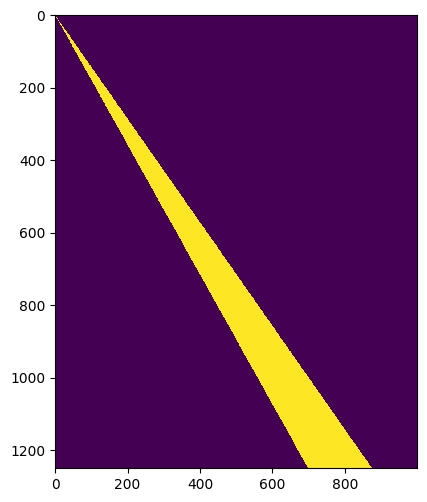

In [5]:
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(beamarea)

In [6]:
#size = 5
size = 100

xmin = 0
xmax = 0
ymin = 0
ymax = 0

for y in range(ny):
    if beamarea[y].sum()>size: # X section is larger then size
        beamsec = np.where(beamarea[y]==1)[0]
        xmax = beamsec[len(beamsec)-1]
        xmin = xmax-size+1
        ymin = y
        ymax = y+size-1
        #print(y, beamsec,xmin,xmax,ymin,ymax)
        if beamarea[ymax][xmin]==1:
            break

print(xmin,xmax,ymin,ymax)

for y in range(ymin,ymax+1):
    for x in range(xmin,xmax+1):
        beamarea[y][x]=2
        
beamarea[ymin][xmin]=3

print("Solution Part 2 =",xmin*10000+ymin)

667 766 1097 1196
Solution Part 2 = 6671097


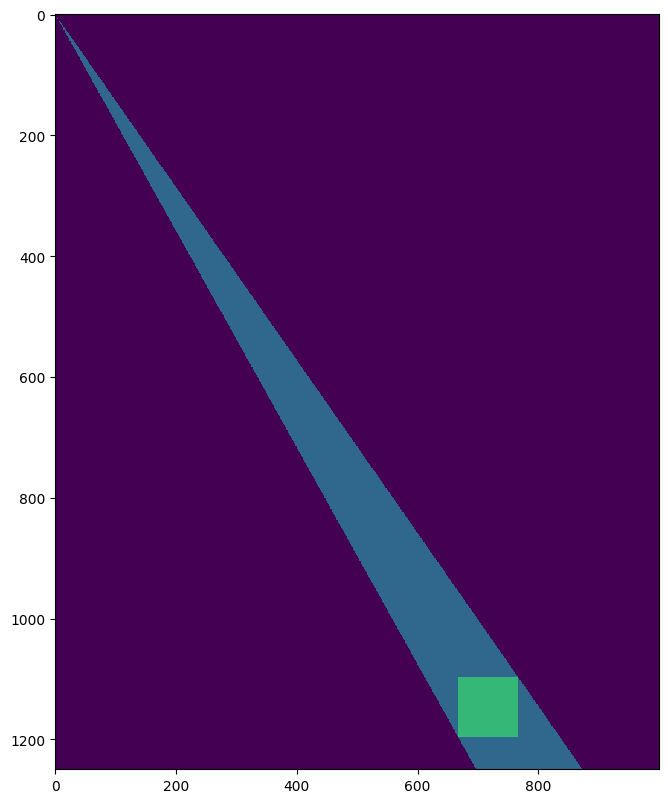

In [7]:
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(beamarea)